In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [134]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [135]:
df = sklearn.datasets.load_breast_cancer()

In [136]:
dataFrame = pd.DataFrame(df.data, columns = df.feature_names)

In [137]:
dataFrame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [138]:
dataFrame['label'] = df.target

In [139]:
dataFrame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [140]:
dataFrame.shape

(569, 31)

In [141]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [142]:
dataFrame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [143]:
dataFrame['label'].value_counts()

,count
label,
1,357
0,212


In [144]:
# Here 1---> Benign,  0---> Maligant

In [145]:
X = dataFrame.drop(columns = 'label', axis = 1)
y = dataFrame['label']

In [171]:
X


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [147]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [149]:
X_train.shape

(455, 30)

In [168]:
# Normalizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


array([-0.04462793, -1.41612656, -0.05903514, -0.16234067,  2.0202457 ,
       -0.11323672,  0.18500609,  0.47102419,  0.63336386,  0.26335737,
        0.53209124,  2.62763999,  0.62351167,  0.11405261,  1.01246781,
        0.41126289,  0.63848593,  2.88971815, -0.41675911,  0.74270853,
       -0.32983699, -1.67435595, -0.36854552, -0.38767294,  0.32655007,
       -0.74858917, -0.54689089, -0.18278004, -1.23064515, -0.6268286 ])

In [151]:
model = Sequential()

In [152]:
model.add(Flatten(input_shape = (30,), ))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [153]:
X_train_std.shape

(455, 30)

In [154]:
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [155]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [156]:
history = model.fit(X_train_std, y_train, validation_split = 0.2,  epochs = 100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 795ms/step - accuracy: 0.6157 - loss: 0.6516 - val_accuracy: 0.9011 - val_loss: 0.5178
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8557 - loss: 0.5225 - val_accuracy: 0.9451 - val_loss: 0.4690
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9562 - loss: 0.4280 - val_accuracy: 0.9670 - val_loss: 0.4292
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9792 - loss: 0.4171 - val_accuracy: 0.9780 - val_loss: 0.3783
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.3402 - val_accuracy: 0.9560 - val_loss: 0.2706
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.2023 - val_accuracy: 0.9560 - val_loss: 0.1345
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9808 - loss: 0.0870 - val_accuracy: 0.9560 - val_loss: 0.0876
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9960 - loss: 0.0434 - val_accuracy: 0.9670 

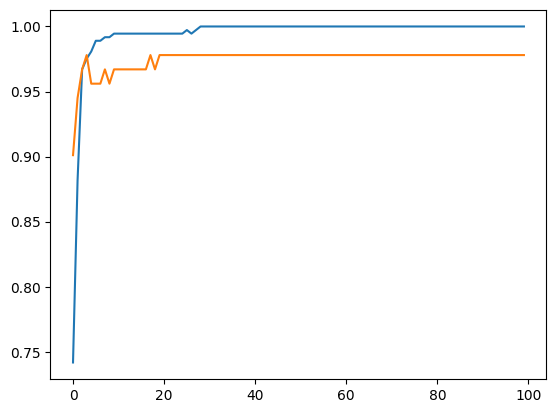

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

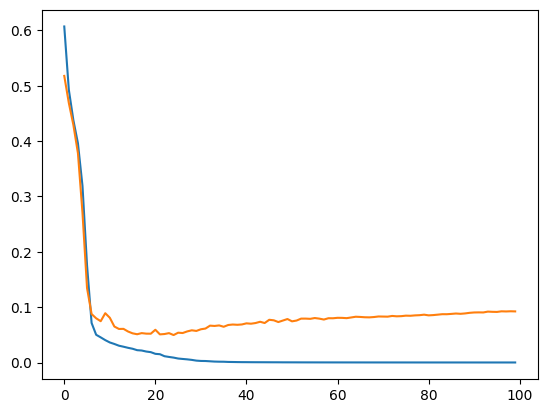

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [159]:
loss , accuracy = model.evaluate(X_test_std, y_test)
print(accuracy, loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.9627 - loss: 0.2103
0.9561403393745422 0.23479042947292328


In [161]:
y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


In [162]:
y_pred

array([[6.3162845e-01, 9.9995983e-01],
       [9.2214274e-01, 9.9613023e-01],
       [7.8342044e-01, 1.0000000e+00],
       [1.0000000e+00, 3.1473703e-17],
       [6.7298728e-01, 9.9854207e-01],
       [1.0000000e+00, 3.9352666e-10],
       [6.2759322e-01, 9.9989152e-01],
       [8.5984403e-01, 1.0000000e+00],
       [7.7146572e-01, 9.9999988e-01],
       [8.4090132e-01, 1.0000000e+00],
       [9.9945158e-01, 2.5830412e-02],
       [9.9674559e-01, 9.9862891e-01],
       [8.2624567e-01, 9.9955732e-01],
       [7.6854593e-01, 9.9951327e-01],
       [7.6214844e-01, 1.0000000e+00],
       [1.0000000e+00, 4.6985519e-07],
       [8.1543040e-01, 9.9999988e-01],
       [7.4433225e-01, 9.9999988e-01],
       [7.3342139e-01, 9.9999976e-01],
       [1.0000000e+00, 1.7163943e-08],
       [9.8736864e-01, 1.0000000e+00],
       [7.5738573e-01, 9.9999988e-01],
       [7.9913974e-01, 1.0000000e+00],
       [8.2223105e-01, 1.0000000e+00],
       [7.0555991e-01, 9.9998283e-01],
       [1.0000000e+00, 1.

In [163]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [174]:
input_data = (11.76,21.6,74.72,427.9,0.08,0.04,0.01,0.01,0.14,0.058,0.406,1.21,2.635,28.47,0.0058,0.0097,0.011,0.0074,0.02406,0.00176,12.98,25.72,82.98,516.5,0.1085,0.086,0.055,0.037,0.24,0.065)

# data to numpy array
input_data_numpy_array = np.asarray(input_data)

# reshape the dataset
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

# standardised the input data
input_data_std = scaler.transform(input_data_reshaped)

# prediction
prediction = model.predict(input_data_std)

# labelling prediction
prediction_label = [np.argmax(prediction)]

if(prediction_label[0] == 0):
  print('Maligant')
else:
  print('Benign')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Benign
